In [283]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import remove_non_sample as rns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
from stargazer.stargazer import Stargazer

In [284]:
# File Paths
absolute_path = "C:\\Users\\tykun\\\OneDrive\\Documents\\SchoolDocs\VSCodeProjects\\connectedData\\board_analysis\\"
altered_dataframes = "altered_dataframes\\"
gpt_dataframes = "gpt_dataframes\\"
graphs = "graphs\\"
scripts =  "scripts\\"
board_dataframes = "board_dataframes\\"
temporary = "temporary_data\\"
college_matching = "college_matching\\"

altered_dataframe_path = f"{absolute_path}{altered_dataframes}"
gpt_dataframe_path = f"{absolute_path}{gpt_dataframes}" 
graph_path = f"{absolute_path}{graphs}"
script_path = f"{absolute_path}{scripts}"
boards_path = f"{absolute_path}{board_dataframes}"
temporary_data_path = f"{absolute_path}{temporary}"
college_matching_path = f"{absolute_path}{college_matching}"


# Valid Years
years = ["1999", "2000", "2005", "2008", "2009", "2013"]

#Created Files
university_boards_statistics_path = f"{altered_dataframe_path}sample_board_statistics.csv"
university_admissions_path = f"{college_matching_path}university_admission_rate.csv"
university_demographics_path = f"{college_matching_path}university_student_demographics.csv"

In [285]:
university_board_statistics_df = pd.read_csv(university_boards_statistics_path)
university_admissions_df = pd.read_csv(university_admissions_path)
university_demographics_df = pd.read_csv(university_demographics_path)

In [286]:
# Merge admissions data into board stats
university_board_statistics_df = university_board_statistics_df.merge(
    university_admissions_df.rename(columns={"year": "Year"}), 
    on=["Year", "AffiliationId"], 
    how="left"
)

# Merge demographics data into board stats
university_board_statistics_df = university_board_statistics_df.merge(
    university_demographics_df.rename(columns={"year": "Year"}), 
    on=["Year", "AffiliationId"], 
    how="left"
)

print(university_board_statistics_df.head())


   Year                   Institution  AffiliationId  female_president  \
0  1999  Abilene Christian University     60205797.0             False   
1  1999            Adelphi University     71965598.0             False   
2  1999           Agnes Scott College     64506506.0              True   
3  1999                Albion College     45644089.0             False   
4  1999             Alfred University     49502546.0             False   

  PrimarySample  total_members  female  male  unknown  male_change  ...  \
0         False           84.0      12    65        7          NaN  ...   
1          True           17.0       3    13        1          NaN  ...   
2         False           29.0      12    14        3          NaN  ...   
3         False           31.0       4    26        1          NaN  ...   
4         False           29.0       7    22        0          NaN  ...   

   student.demographics.unemployment  student.demographics.men  \
0                                NaN  

In [287]:
university_board_statistics_df['female_proportion'] = \
         university_board_statistics_df.apply(
             lambda row: row['female'] / row['total_members'] if row['total_members'] > 0 else 0,
             axis=1
         )

# university_board_statistics_df = rns.remove_non_samples(university_board_statistics_df)


In [288]:
# '''The issue with this code is that theres 180 different insitutions being converted into dummies, which im not sure if we need to be doing.
# So in the next cell, i do this without making them into dummies'''

# # Independent variables
# independent_vars = [
#     "admissions.admission_rate.overall", 
#     "student.students_with_pell_grant", 
#     "student.demographics.avg_family_income", 
#     "student.demographics.poverty_rate", 
#     "student.demographics.women",
#     "female_proportion"
# ]

# # Dependent variable: female president (True/False)
# dependent_var = "female_president"

# # Panel identifiers
# entity_var = "Institution"
# year_var = "Year"

# # -- 1. Drop rows with missing data
# regression_data = university_board_statistics_df.dropna(
#     subset=[dependent_var] + independent_vars + [year_var, entity_var]
# ).copy()

# # -- 2. Ensure the dependent variable is numeric (0/1)
# regression_data[dependent_var] = regression_data[dependent_var].astype(int)

# # -- 3. Create dummy variables for entity and year
# regression_data = pd.get_dummies(
#     regression_data,
#     columns=[entity_var, year_var],
#     drop_first=True
# )

# # -- 4. Convert any boolean columns to integers
# for col in regression_data.select_dtypes(include='bool').columns:
#     regression_data[col] = regression_data[col].astype(int)

# # -- 5. Re-check and handle any remaining NA values
# regression_data = regression_data.fillna(0)  # Replace remaining NaNs with 0

# # -- 6. Define predictors
# institution_dummies = [col for col in regression_data.columns if col.startswith(f"{entity_var}_")]
# year_dummies = [col for col in regression_data.columns if col.startswith(f"{year_var}_")]

# all_predictors = independent_vars + institution_dummies + year_dummies

# # Ensure all predictors are numeric
# X = regression_data[all_predictors].apply(pd.to_numeric, errors='coerce')
# y = regression_data[dependent_var]

# # Check again for NAs after coercing to numeric
# X = X.fillna(0)  # Replace any NaNs after conversion
# y = y.fillna(0)

# # Verify all data types
# print("Final Data Types:")
# print(X.dtypes)

# # -- 7. Add a constant term (intercept) to X
# X = sm.add_constant(X)

# # -- 8. Fit the logistic regression model
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# # -- 9. Print the summary
# print(result.summary())

# # -- 10. Calculate odds ratios and p-values
# odds_ratios = pd.DataFrame({
#     "Variable": X.columns,
#     "Coefficient": result.params,
#     "Odds Ratio": np.exp(result.params),
#     "P-Value": result.pvalues
# })
# print(tabulate(odds_ratios, headers="keys", tablefmt="grid"))

In [289]:
# # Independent variables
# independent_vars = [
#     "admissions.admission_rate.overall", 
#     #"student.students_with_pell_grant", 
#     "student.demographics.avg_family_income", 
#     "student.demographics.poverty_rate", 
#     #"student.demographics.women",
#     "female_proportion"
# ]

# # Dependent variable: female president (True/False)
# dependent_var = "female_president"

# # Time variable
# year_var = "Year"

# # -- 1. Drop rows with missing data
# regression_data = university_board_statistics_df.dropna(
#     subset=[dependent_var] + independent_vars + [year_var]
# ).copy()

# # -- 2. Ensure the dependent variable is numeric (0/1)
# regression_data[dependent_var] = regression_data[dependent_var].astype(int)

# # -- 3. Create dummy variables for the Year (NOT for Institution)
# regression_data = pd.get_dummies(
#     regression_data,
#     columns=[year_var],
#     drop_first=True
# )

# # -- 4. Define predictors and outcome
# all_predictors = independent_vars + [col for col in regression_data.columns if col.startswith(f"{year_var}_")]
# X = regression_data[all_predictors]
# y = regression_data[dependent_var]

# # -- 5. Add a constant term (intercept) to X
# X = sm.add_constant(X)

# # -- 6. Fit the logistic regression model
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# # -- 7. Print the summary
# print(result.summary())

# # -- 8. Calculate odds ratios and p-values
# odds_ratios = pd.DataFrame({
#     "Variable": X.columns,
#     "Coefficient": result.params,
#     "Odds Ratio": np.exp(result.params),
#     "P-Value": result.pvalues
# })
# print(tabulate(odds_ratios, headers="keys", tablefmt="grid"))

In [290]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from tabulate import tabulate

# Independent variables

# independent_vars = [
#     "admissions.admission_rate.overall", 
#     "student.students_with_pell_grant", 
#     "student.demographics.avg_family_income", 
#     "student.demographics.poverty_rate", 
#     "student.demographics.women",
#     # "female_proportion"
# ]

independent_vars = [
    "admissions.admission_rate.overall", 
    "student.demographics.avg_family_income", 
    "student.demographics.poverty_rate"
]

# Dependent variable: female president (True/False)
dependent_var = "female_president"

# Time variable
year_var = "Year"

# 1. Create interaction term first
regression_data = university_board_statistics_df.copy()
regression_data["female_proportion_total_members"] = regression_data["female_proportion"] * regression_data["total_members"]

# 2. Drop rows with missing data
predictor_vars = independent_vars + ["female_proportion_total_members"] + [year_var]
regression_data = regression_data.dropna(
    subset=[dependent_var] + predictor_vars
).copy()

# 3. Ensure the dependent variable is numeric (0/1)
regression_data[dependent_var] = regression_data[dependent_var].astype(int)

# 4. Create dummy variables for Year
regression_data = pd.get_dummies(
    regression_data,
    columns=[year_var],
    drop_first=True
)

# 5. Define predictors and outcome
all_predictors = independent_vars + ["female_proportion_total_members"] + [
    col for col in regression_data.columns if col.startswith(f"{year_var}_")
]
X = regression_data[all_predictors]
y = regression_data[dependent_var]

# 6. Add a constant term
X = sm.add_constant(X)

# 7. Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(tabulate(vif, headers="keys", tablefmt="grid"))

# 8. Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 9. Print the summary
print(result.summary())

# 10. Calculate odds ratios and p-values
odds_ratios = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": result.params,
    "Odds Ratio": np.exp(result.params),
    "P-Value": result.pvalues
})
print(tabulate(odds_ratios, headers="keys", tablefmt="grid"))


VIF Results:
+----+----------------------------------------+-----------+
|    | Variable                               |       VIF |
+====+========================================+===========+
|  0 | const                                  | 100.566   |
+----+----------------------------------------+-----------+
|  1 | admissions.admission_rate.overall      |   1.2005  |
+----+----------------------------------------+-----------+
|  2 | student.demographics.avg_family_income |   1.98419 |
+----+----------------------------------------+-----------+
|  3 | student.demographics.poverty_rate      |   1.74741 |
+----+----------------------------------------+-----------+
|  4 | female_proportion_total_members        |   1.11867 |
+----+----------------------------------------+-----------+
Optimization terminated successfully.
         Current function value: 0.417915
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       femal

In [292]:
# Independent variables
independent_vars = [
    "admissions.admission_rate.overall", 
    "student.demographics.avg_family_income", 
    "student.demographics.poverty_rate"
]

# Dependent variable: female president (True/False)
dependent_var = "female_president"

# Time variable
year_var = "Year"

# 1. Create interaction term first
regression_data = university_board_statistics_df.copy()
regression_data["female_proportion_total_members"] = regression_data["female_proportion"] * regression_data["total_members"]

# 2. Drop rows with missing data
predictor_vars = independent_vars + ["female_proportion_total_members"] + [year_var]
regression_data = regression_data.dropna(
    subset=[dependent_var] + predictor_vars
).copy()

# 3. Ensure the dependent variable is numeric (0/1)
regression_data[dependent_var] = regression_data[dependent_var].astype(int)

# 4. Create dummy variables for Year
regression_data = pd.get_dummies(
    regression_data,
    columns=[year_var],
    drop_first=True
)

# 5. Define predictors and outcome
all_predictors = independent_vars + ["female_proportion_total_members"] + [
    col for col in regression_data.columns if col.startswith(f"{year_var}_")
]
X = regression_data[all_predictors]
y = regression_data[dependent_var]

# 6. Add a constant term
X = sm.add_constant(X)

# 7. Fit two logistic regression models
logit_model1 = sm.Logit(y, X).fit()

# Simulating a slightly different model (example: dropping one predictor)
X_model2 = X.drop(columns=["admissions.admission_rate.overall"])
logit_model2 = sm.Logit(y, X_model2).fit()

# 8. Stargazer table
stargazer = Stargazer([logit_model1, logit_model2])
stargazer.title("Logistic Regression Results")
stargazer.custom_columns(["Model 1", "Model 2"], [1, 1])
stargazer.show_model_numbers(False)

# Render the LaTeX table
latex_output = stargazer.render_latex()

# 9. Save LaTeX output to a file
with open("regression_table.tex", "w") as f:
    f.write(latex_output)

# Print LaTeX to console
print(latex_output)


Optimization terminated successfully.
         Current function value: 0.417915
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.418273
         Iterations 6
\begin{table}[!htbp] \centering
  \caption{Logistic Regression Results}
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: female_president}} \
\cr \cline{2-3}
\\[-1.8ex] & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2}  \\
\hline \\[-1.8ex]
 admissions.admission_rate.overall & -0.388$^{}$ & \\
& (0.733) & \\
 const & -2.046$^{}$ & -2.459$^{**}$ \\
& (1.366) & (1.122) \\
 female_proportion_total_members & 0.110$^{***}$ & 0.112$^{***}$ \\
& (0.024) & (0.024) \\
 student.demographics.avg_family_income & -0.000$^{}$ & -0.000$^{}$ \\
& (0.000) & (0.000) \\
 student.demographics.poverty_rate & 0.029$^{}$ & 0.034$^{}$ \\
& (0.073) & (0.072) \\
\hline \\[-1.8ex]
 Observations & 389 & 389 \\
 Pseudo $R^2$ & 0.

In [275]:
X_check = X.drop('const', axis=1)  # Drop intercept
vif_data = pd.DataFrame({
    "Variable": X_check.columns,
    "VIF": [variance_inflation_factor(X_check.values, i) for i in range(X_check.shape[1])]
})
print(vif_data)


                                 Variable       VIF
0       admissions.admission_rate.overall  8.156308
1  student.demographics.avg_family_income  7.445375
2       student.demographics.poverty_rate  6.599049
3         female_proportion_total_members  3.161265


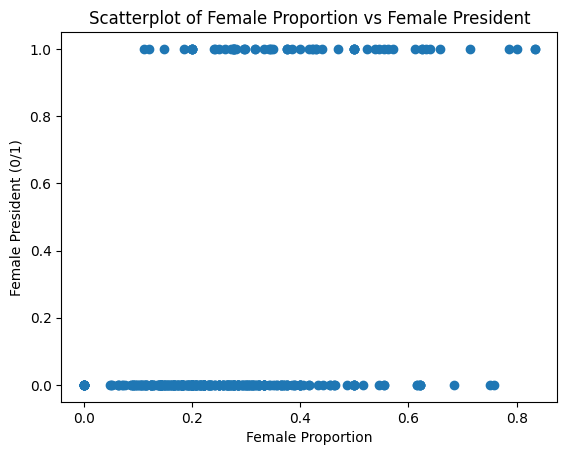

In [ ]:
plt.scatter(regression_data['female_proportion'], regression_data['female_president'])
plt.xlabel('Female Proportion')
plt.ylabel('Female President (0/1)')
plt.title('Scatterplot of Female Proportion vs Female President')
plt.show()

Dependent Variable Distribution:
female_president
0    0.835476
1    0.164524
Name: proportion, dtype: float64


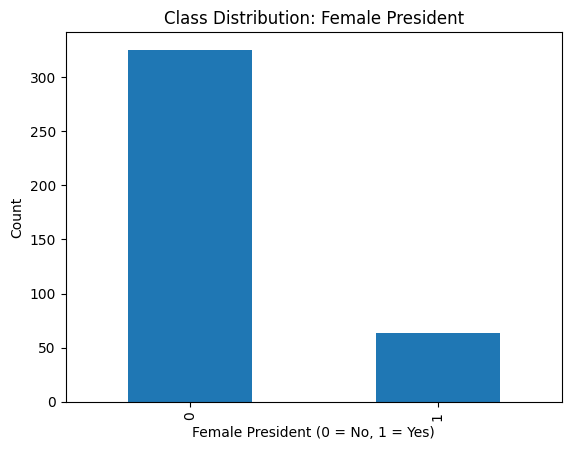

In [277]:
# Check Class Distribution
print("Dependent Variable Distribution:")
print(y.value_counts(normalize=True))

# Visualize class imbalance
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title("Class Distribution: Female President")
plt.xlabel("Female President (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [278]:
from scipy.stats import chi2
from sklearn.utils import resample

# Group predicted probabilities into deciles
model_probs = result.predict(X)  # Predicted probabilities
data = pd.DataFrame({"Actual": y, "Predicted": model_probs})
data["Decile"] = pd.qcut(data["Predicted"], 10, labels=False)

# Calculate observed and expected counts
hosmer_lemeshow = data.groupby("Decile").apply(
    lambda g: pd.Series({
        "Observed_1": g["Actual"].sum(),
        "Expected_1": g["Predicted"].sum(),
        "Observed_0": (g["Actual"] == 0).sum(),
        "Expected_0": g["Predicted"].count() - g["Predicted"].sum(),
    })
)

# Compute the Chi-Squared statistic
hl_stat = (
    ((hosmer_lemeshow["Observed_1"] - hosmer_lemeshow["Expected_1"])**2 / hosmer_lemeshow["Expected_1"]) +
    ((hosmer_lemeshow["Observed_0"] - hosmer_lemeshow["Expected_0"])**2 / hosmer_lemeshow["Expected_0"])
).sum()

# Degrees of freedom
dof = 10 - 2
p_value = chi2.sf(hl_stat, dof)

print(f"Hosmer-Lemeshow Test Statistic: {hl_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

if p_value > 0.05:
    print("Model fits well (p > 0.05).")
else:
    print("Model does not fit well (p <= 0.05).")


Hosmer-Lemeshow Test Statistic: 4.94
Degrees of Freedom: 8
P-Value: 0.7638
Model fits well (p > 0.05).


C:\Users\tykun\AppData\Local\Temp\ipykernel_20752\2503583896.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hosmer_lemeshow = data.groupby("Decile").apply(


In [ ]:
'''for cross validation'''

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")


Cross-Validation Accuracy: 0.8432


c:\Users\tykun\OneDrive\Documents\SchoolDocs\VSCodeProjects\projectEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tykun\OneDrive\Documents\SchoolDocs\VSCodeProjects\projectEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

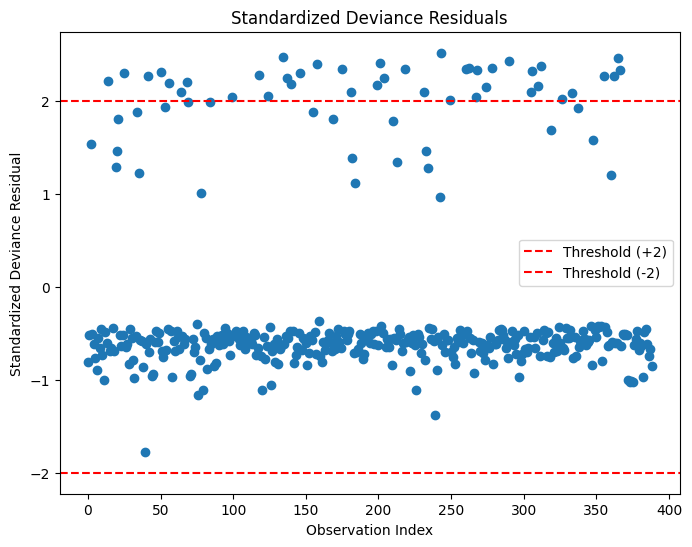

Outlier Indices: [ 14  25  41  50  56  64  68  99 118 124 134 137 140 146 158 175 181 199
 201 204 218 231 243 249 260 262 267 268 274 278 290 305 306 310 312 326
 333 355 362 365 366]


In [281]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities
y_pred = result.predict(X)

# Deviance residuals formula
deviance_residuals = np.sign(y - y_pred) * np.sqrt(-2 * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

# Standardize residuals
standardized_deviance_residuals = deviance_residuals / np.std(deviance_residuals)

# Plot standardized residuals
plt.figure(figsize=(8, 6))
plt.scatter(range(len(standardized_deviance_residuals)), standardized_deviance_residuals)
plt.axhline(y=2, color='r', linestyle='--', label="Threshold (+2)")
plt.axhline(y=-2, color='r', linestyle='--', label="Threshold (-2)")
plt.xlabel("Observation Index")
plt.ylabel("Standardized Deviance Residual")
plt.title("Standardized Deviance Residuals")
plt.legend()
plt.show()

# Identify influential points
outliers = np.where(np.abs(standardized_deviance_residuals) > 2)[0]
print(f"Outlier Indices: {outliers}")


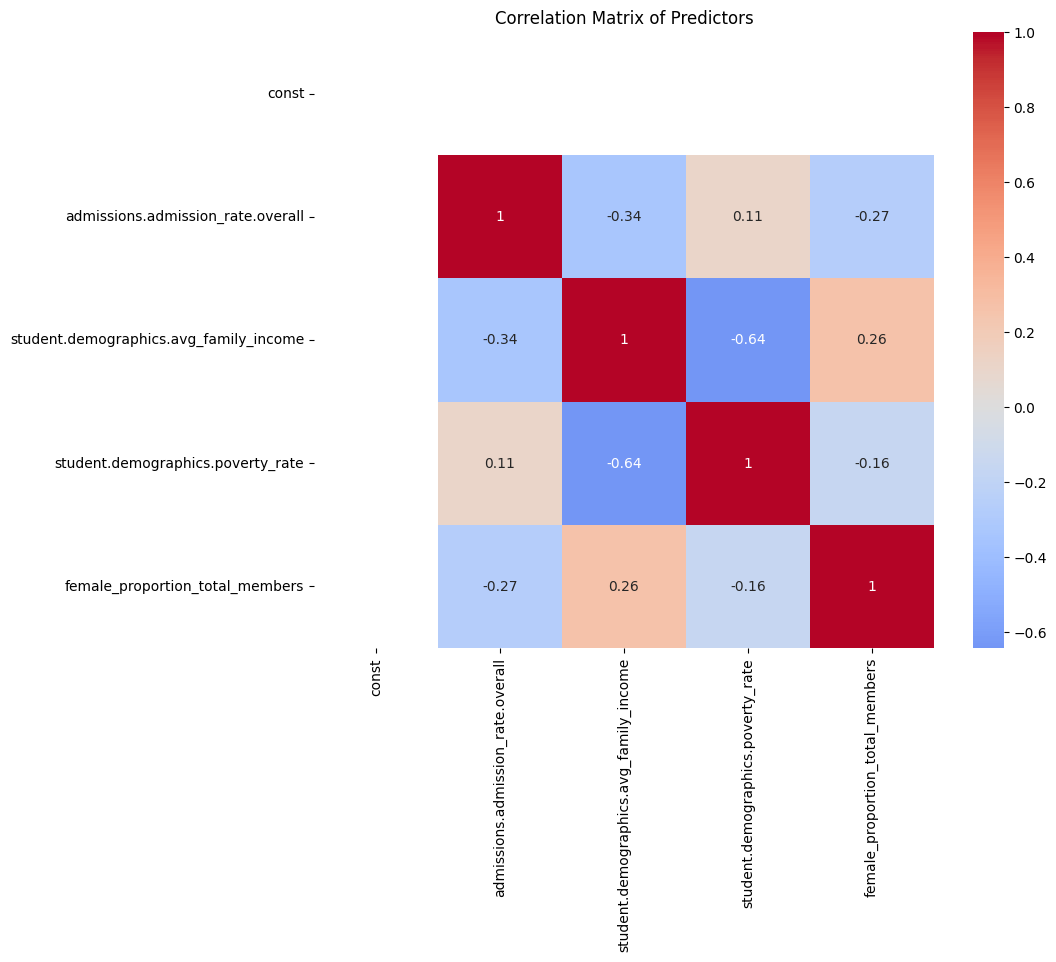

In [250]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Predictors")
plt.show()
